In [218]:
import numpy as np
import matplotlib.pyplot as plt

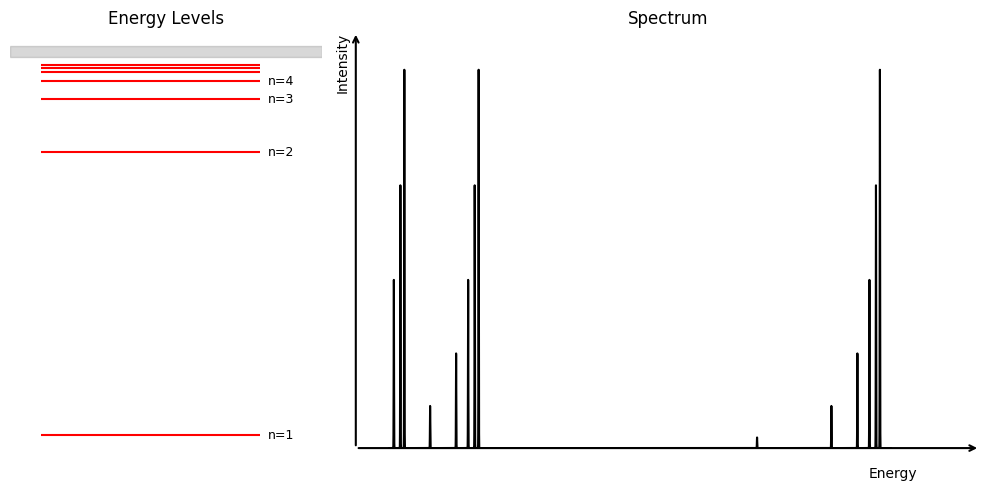

In [219]:
fig, (ax_levels, ax_spectrum) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 2]})

n = np.arange(1, 8)
ion_energy = 3
energies = -ion_energy/(n**2)+ion_energy

x_min, x_max = 0, ion_energy+0.5
y_min, y_max = 0, 1.1

kT = 300
def boltzmann(n):
    E = -ion_energy/(n**2)
    return (2*n**2) * np.exp(-E / kT)

for i, E in enumerate(energies):
    if i>7:
        break
    ax_levels.hlines(E, 0.2, 1.6, color='red')
    if i <= 3:
        ax_levels.text(1.65, E, f'n={i+1}', va='center', fontsize=9)
ax_levels.axhspan(ion_energy, ax_levels.get_ylim()[1], color='gray', alpha=0.3, label='Ionization Region')
# Energy level axis setup
ax_levels.set_xlim(0, 2)
ax_levels.set_ylim(-0.1, 3.2)
ax_levels.axis('off')
ax_levels.set_title('Energy Levels')

# Simulated spectrum (transition energies = E_excited - E_ground)
spectrum_x = []
spectrum_n = []

for i, E_g in enumerate(energies):
    for j, E_e in enumerate(energies):
        energy = E_e - E_g
        if energy>0:
            spectrum_x.append(energy)
            spectrum_n.append(boltzmann(j))
# Create Gaussian-broadened spectrum
x_vals = np.linspace(ion_energy/16, ion_energy, 100000)
y_vals = np.zeros_like(x_vals)
sigma = 0.001

for i, center in enumerate(spectrum_x):
    y_vals += spectrum_n[i]*np.exp(-0.5 * ((x_vals - center) / sigma)**2)
# Normalize
y_vals /= y_vals.max()

# Plot the spectrum
ax_spectrum.axis('off')
# x_vals = np.logspace(np.log10(1e-5), np.log10(x_max), 10000)
# Set limits manually since we removed axes
ax_spectrum.set_xlim(x_min, x_max)
ax_spectrum.set_ylim(y_min, y_max)

# X-axis arrow
ax_spectrum.annotate('', xy=(x_max, 0), xytext=(x_min, 0),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Y-axis arrow
ax_spectrum.annotate('', xy=(0, y_max), xytext=(0, y_min),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Optional: Add labels
ax_spectrum.text(x_max * 0.9, -0.05, 'Energy', ha='right', va='top', fontsize=10)
ax_spectrum.text(-x_max * 0.01, y_max, 'Intensity', ha='right', va='top', rotation='vertical', fontsize=10)

ax_spectrum.plot(x_vals, y_vals, color='black')
ax_spectrum.set_title('Spectrum')

plt.tight_layout()
plt.show()

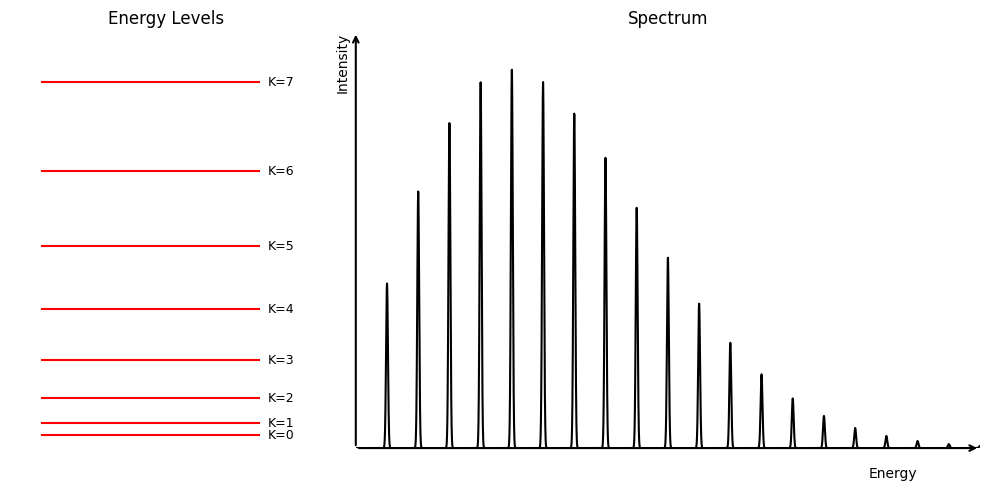

In [220]:
fig, (ax_levels, ax_spectrum) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 2]})

x_min, x_max = 0, 2
y_min, y_max = 0, 1.1

n = np.arange(0, 30)
ion_energy =0.05
energies = ion_energy*n*(n+1)
kT = 3
def boltzmann(K):
    E = ion_energy * K * (K + 1)
    return (2*K + 1) * np.exp(-E / kT)

for i, E in enumerate(energies):
    if i > 7:
        break
    ax_levels.hlines(E, 0.2, 1.6, color='red')
    if i >= 0:
        ax_levels.text(1.65, E, f'K={i}', va='center', fontsize=9)
# Energy level axis setup
ax_levels.set_xlim(0, 2)
ax_levels.set_ylim(-0.1, 3.2)
ax_levels.axis('off')
ax_levels.set_title('Energy Levels')

spectrum_x = []
spectrum_K = []

for i, E_g in enumerate(energies):
    for j, E_e in enumerate(energies):
        energy = E_e - E_g
        if energy>0 and abs(i-j)<=1:
            spectrum_x.append(energy)
            spectrum_K.append(boltzmann(j))  # all transitions equally strong for simplicity

# Create Gaussian-broadened spectrum
x_vals = np.linspace(x_min, x_max, 10000)
y_vals = np.zeros_like(x_vals)
sigma = 0.003

for i, center in enumerate(spectrum_x):
    y_vals +=spectrum_K[i]*np.exp(-0.5 * ((x_vals - center) / sigma)**2)

# Normalize
y_vals /= y_vals.max()

# Plot the spectrum
ax_spectrum.axis('off')

# Set limits manually since we removed axes
ax_spectrum.set_xlim(x_min, x_max)
ax_spectrum.set_ylim(y_min, y_max)

# X-axis arrow
ax_spectrum.annotate('', xy=(x_max, 0), xytext=(x_min, 0),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Y-axis arrow
ax_spectrum.annotate('', xy=(0, y_max), xytext=(0, y_min),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Optional: Add labels
ax_spectrum.text(x_max * 0.9, -0.05, 'Energy', ha='right', va='top', fontsize=10)
ax_spectrum.text(-x_max * 0.01, y_max, 'Intensity', ha='right', va='top', rotation='vertical', fontsize=10)

ax_spectrum.plot(x_vals, y_vals, color='black')
ax_spectrum.set_title('Spectrum')

plt.tight_layout()
plt.show()

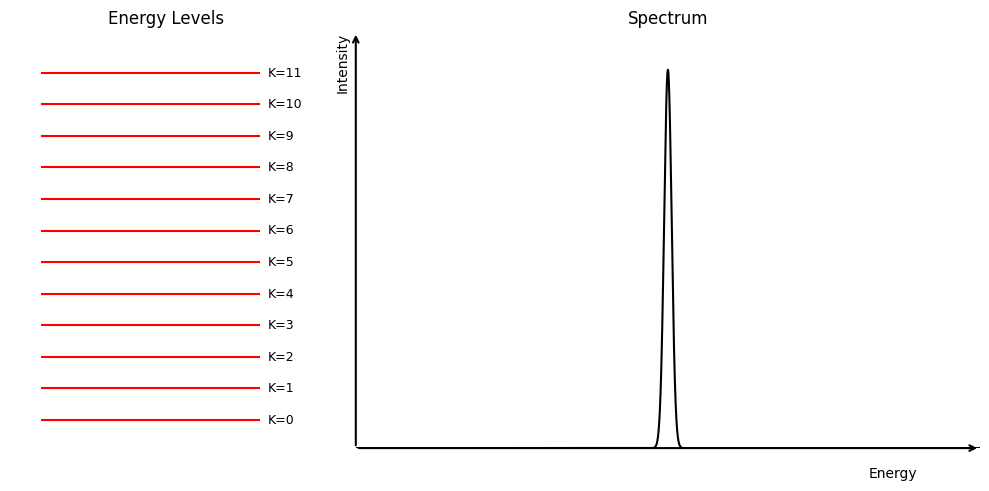

In [221]:
fig, (ax_levels, ax_spectrum) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 2]})

x_min, x_max = 0, 0.5
y_min, y_max = 0, 1.1

n = np.arange(0, 12)
ion_energy =0.25
energies = ion_energy*(n+1/2)

for i, E in enumerate(energies):
    ax_levels.hlines(E, 0.2, 1.6, color='red')
    if i >= 0:
        ax_levels.text(1.65, E, f'K={i}', va='center', fontsize=9)
# Energy level axis setup
ax_levels.set_xlim(0, 2)
ax_levels.set_ylim(-0.1, 3.2)
ax_levels.axis('off')
ax_levels.set_title('Energy Levels')

spectrum_x = []
spectrum_y = []

for i, E_g in enumerate(energies):
    for j, E_e in enumerate(energies):
        energy = E_e - E_g
        if energy>0 and abs(i-j)<=1:
            spectrum_x.append(energy)
            spectrum_y.append(1)  # all transitions equally strong for simplicity

# Create Gaussian-broadened spectrum
x_vals = np.linspace(x_min, x_max, 10000)
y_vals = np.zeros_like(x_vals)
sigma = 0.003

for center in spectrum_x:
    y_vals += np.exp(-0.5 * ((x_vals - center) / sigma)**2)

# Normalize
y_vals /= y_vals.max()

# Plot the spectrum
ax_spectrum.axis('off')

# Set limits manually since we removed axes
ax_spectrum.set_xlim(x_min, x_max)
ax_spectrum.set_ylim(y_min, y_max)

# X-axis arrow
ax_spectrum.annotate('', xy=(x_max, 0), xytext=(x_min, 0),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Y-axis arrow
ax_spectrum.annotate('', xy=(0, y_max), xytext=(0, y_min),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Optional: Add labels
ax_spectrum.text(x_max * 0.9, -0.05, 'Energy', ha='right', va='top', fontsize=10)
ax_spectrum.text(-x_max * 0.01, y_max, 'Intensity', ha='right', va='top', rotation='vertical', fontsize=10)

ax_spectrum.plot(x_vals, y_vals, color='black')
ax_spectrum.set_title('Spectrum')

plt.tight_layout()
plt.show()

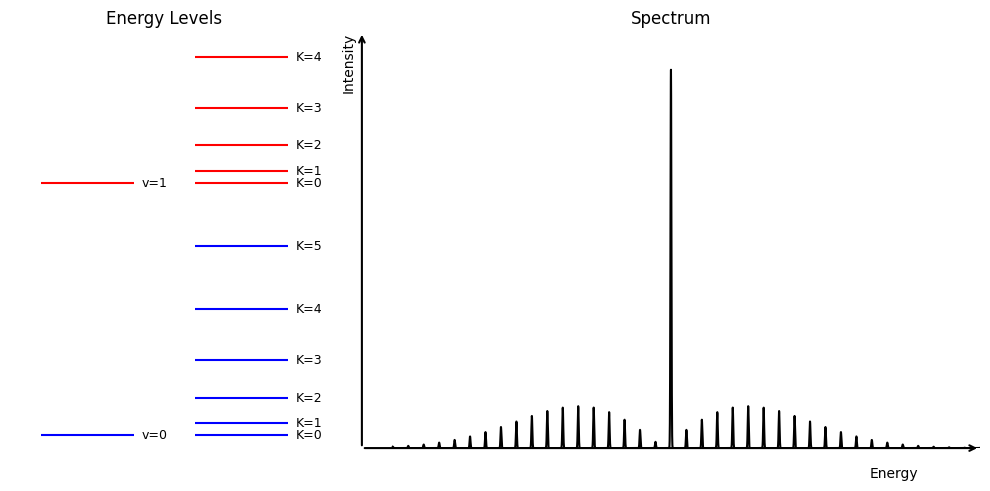

In [222]:
fig, (ax_levels, ax_spectrum) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 2]})

energy_vib = 2
n = np.arange(0, 40)
ion_energy =0.05
vibrational_levels_ground = ion_energy*n*(n+1)
vibrational_levels_excited = vibrational_levels_ground+energy_vib
kT = 3
def boltzmann(J):
    E = ion_energy * J * (J + 1)
    return (2*J + 1) * np.exp(-E / kT)

# Plot ground state vibrational levels
for i, E in enumerate(vibrational_levels_ground):
    if i == 0:
        ax_levels.hlines(E, 0.2, 0.8, color='blue')
        ax_levels.text(0.85, E, f'v={0}', va='center', fontsize=9)
    if i > 5:
        break
    ax_levels.hlines(E, 1.2, 1.8, color='blue')
    ax_levels.text(1.85, E, f'K={i}', va='center', fontsize=9)

# Plot excited state vibrational levels
for i, E in enumerate(vibrational_levels_excited):
    if i == 0:
        ax_levels.hlines(E, 0.2, 0.8, color='red')
        ax_levels.text(0.85, E, f'v={1}', va='center', fontsize=9)
    if i > 4:
        break
    ax_levels.hlines(E, 1.2, 1.8, color='red')
    ax_levels.text(1.85, E, f'K={i}', va='center', fontsize=9)

# Energy level axis setup
ax_levels.set_xlim(0, 2)
ax_levels.set_ylim(-0.1, 3.2)
ax_levels.axis('off')
ax_levels.set_title('Energy Levels')

# Simulated spectrum (transition energies = E_excited - E_ground)
spectrum_x = []
spectrum_J = []

for i, E_g in enumerate(vibrational_levels_ground):
    for j, E_e in enumerate(vibrational_levels_excited):
        energy = E_e - E_g
        if energy>0 and abs(i-j)<=1:
            spectrum_x.append(energy)
            spectrum_J.append(boltzmann(j))

# Create Gaussian-broadened spectrum
x_vals = np.linspace(0.2, 5, 10000)
y_vals = np.zeros_like(x_vals)
sigma = 0.003

for i, center in enumerate(spectrum_x):
    y_vals += spectrum_J[i]*np.exp(-0.5 * ((x_vals - center) / sigma)**2)

# Normalize
y_vals /= y_vals.max()

# Plot the spectrum
ax_spectrum.axis('off')
x_min, x_max = 0, 2*energy_vib
y_min, y_max = 0, 1.1

# Set limits manually since we removed axes
ax_spectrum.set_xlim(x_min, x_max)
ax_spectrum.set_ylim(y_min, y_max)

# X-axis arrow
ax_spectrum.annotate('', xy=(x_max, 0), xytext=(x_min, 0),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Y-axis arrow
ax_spectrum.annotate('', xy=(0, y_max), xytext=(0, y_min),
                     arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# Optional: Add labels
ax_spectrum.text(x_max * 0.9, -0.05, 'Energy', ha='right', va='top', fontsize=10)
ax_spectrum.text(-x_max * 0.01, y_max, 'Intensity', ha='right', va='top', rotation='vertical', fontsize=10)

ax_spectrum.plot(x_vals, y_vals, color='black')
ax_spectrum.set_title('Spectrum')

plt.tight_layout()
plt.show()